<a href="https://colab.research.google.com/github/SDS-AAU/SDS-master/blob/master/M3/notebooks/CNN_with_fast_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Let's start by downloading and exploring the data
!wget -qq https://storage.googleapis.com/sds-file-transfer/dataset.zip
# We need to unzip the data...and as you can see there is a lot
!unzip -qq dataset.zip

In [2]:
!pip install fastai --upgrade -q

     |████████████████████████████████| 194kB 5.6MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 


In [3]:
from fastai.vision.all import *

In [4]:
fields = DataBlock(blocks=(ImageBlock, CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
   splitter=RandomSplitter(valid_pct=0.2, seed=42),
   item_tfms=RandomResizedCrop(224, min_scale=0.5),
   batch_tfms=aug_transforms())

In [5]:
dls = fields.dataloaders('/content/dataset/training_set')

In [6]:
dls.vocab

['cats', 'dogs']

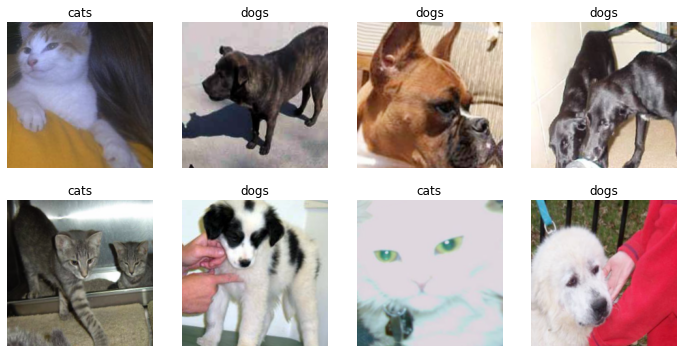

In [8]:
dls.show_batch(max_n=8, nrows = 2)

In [9]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


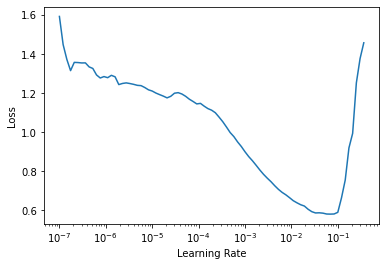

In [10]:
lr_min, lr_steep = learn.lr_find()

In [11]:
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.160633,0.046374,0.015625,00:41
1,0.101829,0.035097,0.008125,00:40
2,0.069336,0.021548,0.007500,00:39
3,0.038090,0.014524,0.005000,00:38
4,0.033115,0.013863,0.004375,00:38


In [12]:
interp = ClassificationInterpretation.from_learner(learn)

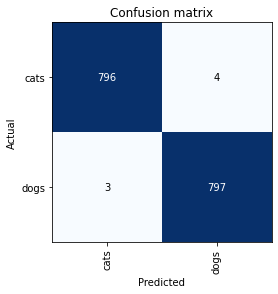

In [13]:
interp.plot_confusion_matrix()